### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations
import statsmodels.api as sm

### Load and Prepare the Data

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
# Remove missing or zero values (to avoid log errors)
data = data[(data['Production Budget'] > 0) & (data['Worldwide Gross'] > 0) & (data['US Gross'] > 0)]

#### 1. Scatter Plot: Budget vs. Revenue

We will first visualize the relationship between Production Budget and Worldwide Gross Revenue.

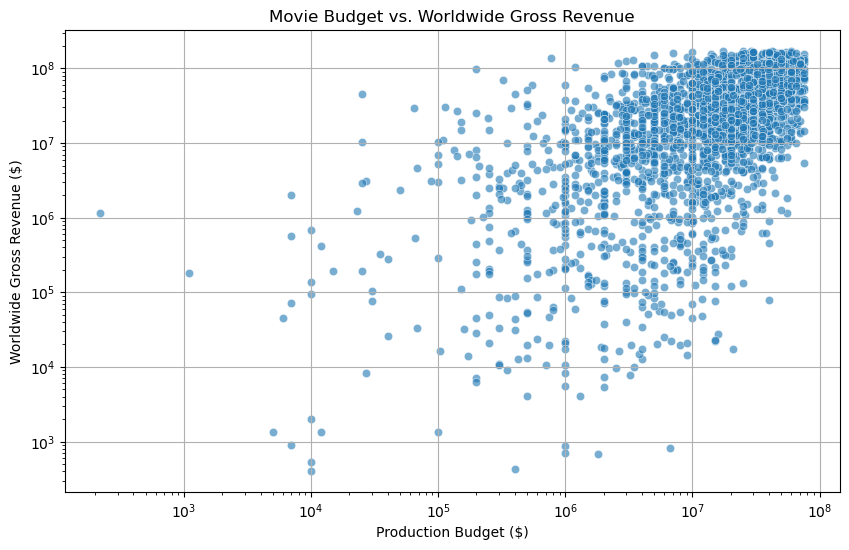

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Production Budget'], y=data['Worldwide Gross'], alpha=0.6)
plt.title("Movie Budget vs. Worldwide Gross Revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")
plt.grid(True)
plt.show()

Logarithmic Scale:
* Why Log Scale? Using a logarithmic scale is essential when dealing with data that spans several orders of magnitude (like movie budgets and revenues). It allows us to visualize both very small and very large values on the same chart without compressing the smaller values into a tiny area.
* Interpretation: On a log scale, equal distances represent equal ratios rather than equal differences. For example, the distance between 10^3 and 10^4 is the same as the distance between 10^6 and 10^7, even though the actual difference in dollars is much larger in the second case.

Interpretation:
* Positive Correlation: There is a positive correlation between production budget and worldwide gross revenue. This means that movies with higher budgets tend to generate higher revenues.
* Wide Spread: The data points are widely scattered, indicating a lot of variability. This shows that budget is not the only factor that influences revenue.
* Clustering at Higher Budgets: There is a noticeable clustering of data points at the higher end of both axes (high budgets and high revenues). This suggests that big-budget movies often achieve significant box office success.
* Outliers: There are some outliers, particularly movies with very low budgets but relatively high revenues. These could be independent films that achieved unexpected success.
* Relationship Not Linear: The relationship between budget and revenue is not linear. While higher budgets generally lead to higher revenues, the increase is not proportional. There are diminishing returns as budgets increase.

Key Takeaways:
* Budget Influences Revenue: Higher production budgets tend to correlate with higher worldwide gross revenues.
* Other Factors Matter: Budget is not the sole determinant of success. Other factors like marketing, genre, star power, and critical reception also play a significant role.
* Blockbuster Effect: Big-budget movies often achieve significant box office success.
* Variability in Returns: There is a wide range of revenue outcomes for movies with similar budgets.

This scatter plot on a logarithmic scale reveals the general trend that higher movie budgets are associated with higher worldwide gross revenues. However, it also highlights the variability in revenue outcomes and emphasizes that budget is not the only factor that contributes to a movie's financial success.

##### Apply Regression Line

We can fit a linear regression to see how well budget predicts revenue.

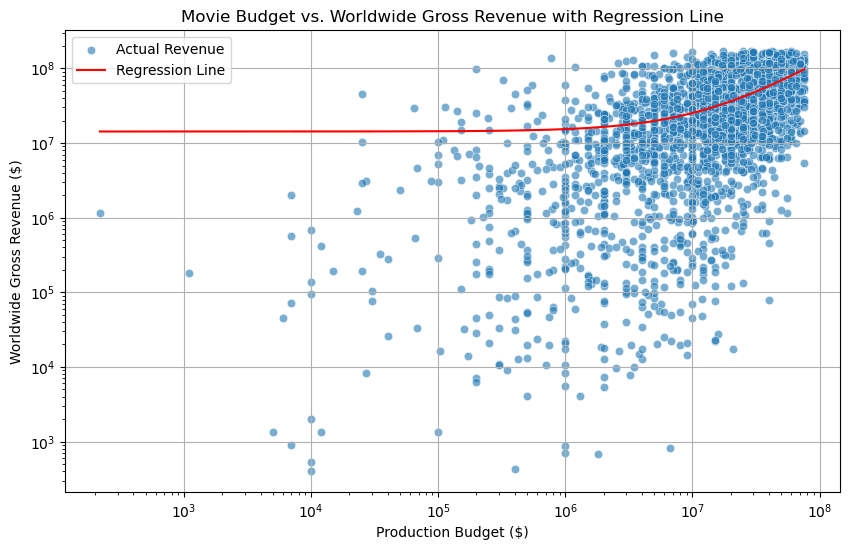

In [5]:
from sklearn.linear_model import LinearRegression

# Reshape budget data for sklearn
X = data[['Production Budget']]
y = data['Worldwide Gross']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
data['Predicted Revenue'] = model.predict(X)

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Production Budget'], y=data['Worldwide Gross'], alpha=0.6, label="Actual Revenue")
sns.lineplot(x=data['Production Budget'], y=data['Predicted Revenue'], color='red', label="Regression Line")
plt.title("Movie Budget vs. Worldwide Gross Revenue with Regression Line")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

Regression Line:
* The red line represents the regression line, which is the line of best fit through the data points. It depicts the general trend of the relationship between production budget and worldwide gross revenue.

Logarithmic Scale:
* As before, the logarithmic scale is used to accommodate the wide range of values for both budget and revenue.

Interpretation:
* Positive Correlation (with Curvature): There is a positive correlation between production budget and worldwide gross revenue, but the relationship is not linear. The regression line shows a clear curve, indicating that the relationship strengthens as budgets increase.
* Weak Correlation at Lower Budgets: At lower budgets (below approximately 10 
6
 ), the regression line is relatively flat, suggesting a weak correlation between budget and revenue. This means that at low budgets, increasing the budget doesn't necessarily lead to a significant increase in revenue.
* Stronger Correlation at Higher Budgets: At higher budgets (above approximately 10 
6
 ), the regression line slopes upward more steeply, indicating a stronger correlation. This means that at high budgets, increasing the budget tends to lead to a more substantial increase in revenue.
* Wide Scatter: The data points are still widely scattered around the regression line, indicating that budget is not the only factor that influences revenue.
* Outliers: Outliers are still present, particularly movies with low budgets but high revenue, and movies with high budgets but lower-than-expected revenue.

Key Takeaways:
* Budget Influences Revenue, but Not Linearly: Higher production budgets tend to correlate with higher worldwide gross revenues, but the relationship is stronger at higher budgets.
* Diminishing Returns at Lower Budgets: Increasing budgets at lower levels doesn't guarantee a proportional increase in revenue.
* Stronger Impact at Higher Budgets: Increasing budgets at higher levels tends to have a more significant impact on revenue.
* Other Factors Matter: Budget is not the sole determinant of success. Other factors like marketing, genre, star power, and critical reception also play a significant role.
* Regression Line Captures Trend: The regression line effectively captures the general trend of the relationship, highlighting the stronger correlation at higher budgets.

This scatter plot with a regression line on a logarithmic scale provides a more nuanced understanding of the relationship between movie budget and worldwide gross revenue. It shows that while budget does influence revenue, the strength of the relationship varies depending on the budget level. The chart also emphasizes the importance of other factors beyond budget in determining a movie's financial success.

#### 2. Polynomial Fit for Better Prediction

A polynomial regression (degree 2) might fit the data better.

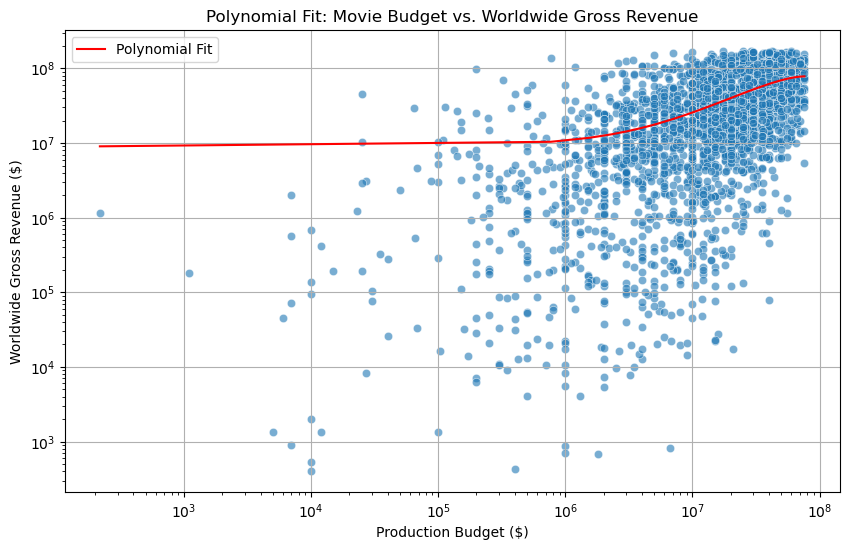

In [6]:
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial regression (quadratic)
poly_model = Polynomial.fit(data['Production Budget'], data['Worldwide Gross'], 2)

# Generate predicted values
budget_range = np.linspace(data['Production Budget'].min(), data['Production Budget'].max(), 100)
predicted_revenue = poly_model(budget_range)

# Scatter plot with polynomial regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Production Budget'], y=data['Worldwide Gross'], alpha=0.6)
plt.plot(budget_range, predicted_revenue, color='red', label="Polynomial Fit")
plt.title("Polynomial Fit: Movie Budget vs. Worldwide Gross Revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

Data Points:
* Each blue circle represents a single movie and its corresponding production budget and worldwide gross revenue.

Polynomial Fit:
* The red line represents the polynomial regression line, which is a curve of best fit through the data points. It depicts the general trend of the relationship between production budget and worldwide gross revenue, allowing for more complex patterns than a simple linear regression.

Logarithmic Scale:
* As before, the logarithmic scale is used to accommodate the wide range of values for both budget and revenue.

Interpretation:
* Positive Correlation with Curvature: There is a positive correlation between production budget and worldwide gross revenue, and the polynomial fit captures the non-linear nature of this relationship.
* Weak Correlation at Lower Budgets: At lower budgets (below approximately 10 
6
 ), the polynomial fit is relatively flat, suggesting a weak correlation between budget and revenue. This means that at low budgets, increasing the budget doesn't necessarily lead to a significant increase in revenue.
* Stronger Correlation at Higher Budgets: At higher budgets (above approximately 10 
6
 ), the polynomial fit curves upwards more steeply, indicating a stronger correlation. This means that at high budgets, increasing the budget tends to lead to a more substantial increase in revenue.
* Wide Scatter: The data points are still widely scattered around the polynomial fit, indicating that budget is not the only factor that influences revenue.
* Polynomial Fit Captures Curvature: The polynomial fit effectively captures the curvature in the relationship, showing that the impact of budget on revenue is not constant across all budget levels.
* Potential Overfitting: It's important to consider whether the polynomial fit is overfitting the data. A very high-degree polynomial could fit the noise in the data rather than the underlying trend. Visual inspection suggests this fit is reasonable, but further statistical analysis might be needed.

Key Takeaways:
* Budget Influences Revenue, but Not Linearly: Higher production budgets tend to correlate with higher worldwide gross revenues, but the relationship is stronger at higher budgets.
* Diminishing Returns at Lower Budgets: Increasing budgets at lower levels doesn't guarantee a proportional increase in revenue.
* Stronger Impact at Higher Budgets: Increasing budgets at higher levels tends to have a more significant impact on revenue.
* Other Factors Matter: Budget is not the sole determinant of success. Other factors like marketing, genre, star power, and critical reception also play a significant role.
* Polynomial Fit Captures Trend: The polynomial fit effectively captures the general trend of the relationship, highlighting the stronger correlation at higher budgets and the non-linear nature of the relationship.

This scatter plot with a polynomial fit on a logarithmic scale provides a more accurate representation of the relationship between movie budget and worldwide gross revenue compared to a simple linear regression. It highlights the stronger correlation at higher budgets and the non-linear nature of the relationship, suggesting that the impact of budget on revenue is not constant across all budget levels.

#### 3. Identify Overperforming & Underperforming Movies

Let’s explore movies that had large budgets but underperformed and low-budget movies that overperformed.

In [7]:
# Calculate the revenue-to-budget ratio
data['Revenue-to-Budget Ratio'] = data['Worldwide Gross'] / data['Production Budget']

# Find underperforming movies (High budget, low revenue)
underperformers = data.nsmallest(10, 'Revenue-to-Budget Ratio')

# Find overperforming movies (Low budget, high revenue)
overperformers = data.nlargest(10, 'Revenue-to-Budget Ratio')

print("Underperforming Movies:")
print(underperformers[['Title', 'Production Budget', 'Worldwide Gross', 'Revenue-to-Budget Ratio']])

print("\nOverperforming Movies:")
print(overperformers[['Title', 'Production Budget', 'Worldwide Gross', 'Revenue-to-Budget Ratio']])

Underperforming Movies:
                       Title  Production Budget  Worldwide Gross  \
2019        Perrier's Bounty          6600000.0            828.0   
241   Ed and his Dead Mother          1800000.0            673.0   
1683          The Jimmy Show          1000000.0            703.0   
1884                   Molly         21000000.0          17396.0   
388      In Her Line of Fire          1000000.0            884.0   
201           The Dark Hours           400000.0            423.0   
1487          The Good Night         15000000.0          22441.0   
2080     All the Queen's Men         15000000.0          22723.0   
1993             Opal Dreams          9000000.0          14443.0   
1513                    Good         16000000.0          27276.0   

      Revenue-to-Budget Ratio  
2019                 0.000125  
241                  0.000374  
1683                 0.000703  
1884                 0.000828  
388                  0.000884  
201                  0.001058  
148

Underperforming Movies:
* High Budget, Low Revenue: The underperforming movies are characterized by having relatively high production budgets but very low worldwide gross revenues.
* Low Revenue-to-Budget Ratio: The 'Revenue-to-Budget Ratio' for these movies is extremely low, indicating that they barely recouped their production costs. In some cases, the revenue is orders of magnitude lower than the budget.
* Examples: "Perrier's Bounty" had a $6.6 million budget but only grossed $828 worldwide, resulting in a ratio of 0.000125.

Overperforming Movies:
* Low Budget, High Revenue: The overperforming movies are characterized by having very low production budgets but extremely high worldwide gross revenues.
* High Revenue-to-Budget Ratio: The 'Revenue-to-Budget Ratio' for these movies is exceptionally high, indicating that they generated a huge return on their investment.
* Examples: "Tarnation" had a budget of only $218 but grossed over $1.1 million worldwide, resulting in a ratio of 5330.34.

Analysis:
* Independent Films: Many of the overperforming movies are independent films or cult classics with very low budgets.
* Cult Classics and Surprise Hits: These movies often achieve unexpected success through word-of-mouth, critical acclaim, or unique marketing strategies.
* Big Budget Flops: The underperforming movies highlight the risk associated with high-budget productions. Even with substantial resources, a movie can fail to generate sufficient revenue.
* Ratio as a Metric: The revenue-to-budget ratio is a useful metric for identifying movies that have achieved significant financial success relative to their production costs.

Possible Further Exploration:
* Reasons for Underperformance: Investigate the reasons why the underperforming movies failed to generate revenue. This could involve analyzing marketing campaigns, critical reception, audience feedback, and other factors.
* Factors Contributing to Overperformance: Explore the factors that contributed to the success of the overperforming movies. This could involve examining the movie's content, marketing, distribution, and cultural impact.
* Statistical Significance: Perform statistical tests to determine if the differences in revenue-to-budget ratios between the underperforming and overperforming movies are statistically significant.
* Genre Analysis: Analyze if there are any genre trends among the overperforming or underperforming movies.

### 4. Visualizing Overperformers vs. Underperformers

We can highlight these movies in the scatter plot.

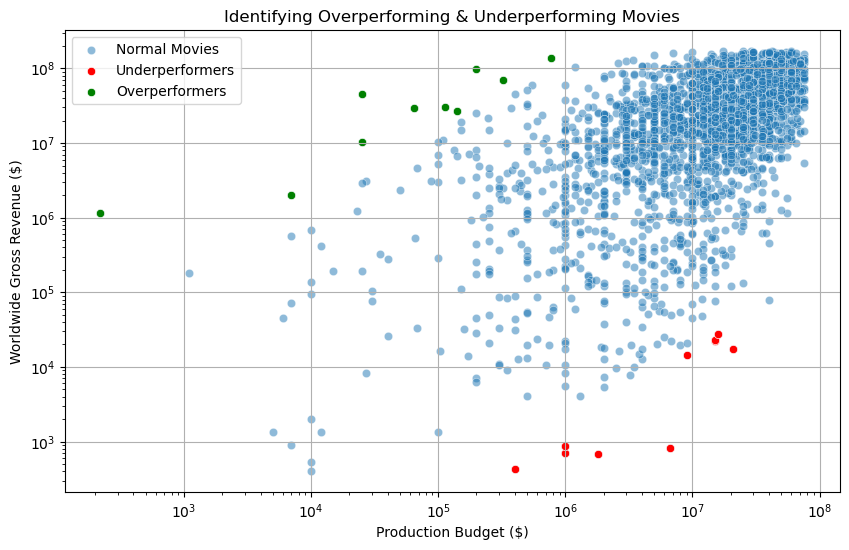

In [8]:
plt.figure(figsize=(10, 6))

# Normal movies
sns.scatterplot(x=data['Production Budget'], y=data['Worldwide Gross'], alpha=0.5, label="Normal Movies")

# Underperformers in red
sns.scatterplot(x=underperformers['Production Budget'], y=underperformers['Worldwide Gross'], color='red', label="Underperformers")

# Overperformers in green
sns.scatterplot(x=overperformers['Production Budget'], y=overperformers['Worldwide Gross'], color='green', label="Overperformers")

plt.title("Identifying Overperforming & Underperforming Movies")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

Data Points:
* Blue Circles: Represent Normal Movies - movies that are neither classified as underperforming nor overperforming.
* Red Circles: Represent Underperforming Movies - movies with high budgets but low revenues, as identified by a low revenue-to-budget ratio.
* Green Circles: Represent Overperforming Movies - movies with low budgets but high revenues, as identified by a high revenue-to-budget ratio.

Logarithmic Scale:
* As before, the logarithmic scale is used to accommodate the wide range of values for both budget and revenue.

Interpretation:
* Positive Correlation for Normal Movies: The blue circles (Normal Movies) show a general positive correlation between production budget and worldwide gross revenue, confirming the trend we've seen in previous charts.
* Underperformers in Bottom-Right Corner: The red circles (Underperformers) are located in the bottom-right corner of the chart. This confirms that these movies had relatively high budgets but low revenues.
* Overperformers in Top-Left Corner: The green circles (Overperformers) are located in the top-left corner of the chart. This confirms that these movies had relatively low budgets but high revenues.
* Visual Confirmation of Ratio Analysis: The chart provides a visual confirmation of the revenue-to-budget ratio analysis. The positions of the red and green circles clearly demonstrate the concepts of underperformance and overperformance.
* Outliers: The chart highlights the outliers in the dataset, particularly the overperforming movies that achieved significant success with limited budgets.

Key Takeaways:
* Visual Identification: The chart effectively visually identifies underperforming and overperforming movies based on their budget and revenue.
* Confirmation of Analysis: It confirms the results of the revenue-to-budget ratio analysis.
* Outlier Highlighting: It highlights the outliers, particularly the overperforming movies, which are often of interest.
* Contextual Understanding: It provides a visual context for understanding the relationship between budget and revenue, showing how the highlighted movies deviate from the general trend.

This scatter plot provides a clear and intuitive way to visualize and understand the concept of underperforming and overperforming movies based on their budget and revenue. The chart effectively highlights the outliers and confirms the results of the revenue-to-budget ratio analysis.